In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from astropy.io import fits
import numpy as np
import sys
sys.path.insert(0,'/Users/dl264294/Desktop/github/howls_step3')
sys.path.insert(0,'Volumes/Extreme_SSD/Euclid/Euclid/howls_step3/convergence_maps/LCDM/')
from lenspack.image.transforms import starlet2d
from lenspack.peaks import peaks_histogram
from howls.peak_counts import get_wavelet_normalization, wavelet_peak_counts, wavelet_l1_norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=fits.open('/Users/dl264294/Desktop/github/flowpm/notebooks/kmap.fits')
kmap=data[0].data

In [ ]:
#from howls.data import load_maps

# Loading the maps
#kmaps = load_maps(map_type='ks_nomask_shear')

# Let's compute the normalization of wavelet scales
#wtnorm_or = get_wavelet_normalization(kmaps['fid'][0], nscales=5)

# And derive the bin edges for each scales
#bin_edges_or = np.stack([n*np.linspace(-0.1,0.5,16) for n in wtnorm_or],axis=0)


#kmaps['fid'].shape

In [4]:
# Let's compute the normalization of wavelet scales
wtnorm = get_wavelet_normalization(kmap, nscales=5)

In [5]:
# And derive the bin edges for each scales
bin_edges = np.stack([n*np.linspace(-0.1,0.5,16) for n in wtnorm],axis=0)

In [6]:
# And compute the peak counts
peak_counts = wavelet_peak_counts(kmap, bin_edges=bin_edges)

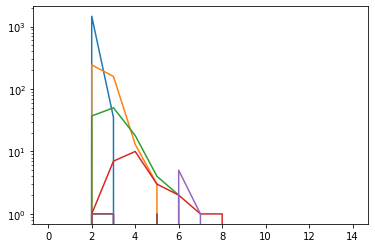

In [7]:
plot(peak_counts[0])
plot(peak_counts[1])
plot(peak_counts[2])
plot(peak_counts[3])
plot(peak_counts[4])
plot(peak_counts[5])
yscale('log')

In [8]:
kappa_wt = starlet2d(kmap, nscales=6)

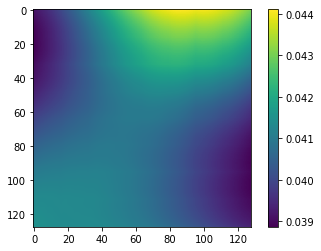

In [9]:
imshow((kappa_wt[-1])); colorbar();

In [10]:
# Let's compute the normalization of wavelet scales
wtnorm = get_wavelet_normalization(kmap, nscales=6)
# And derive the bin edges for each scales
bin_edges = np.stack([n*np.linspace(-0.1,0.5,16) for n in wtnorm],axis=0)

res = wavelet_l1_norm(kmap,wtnorm)

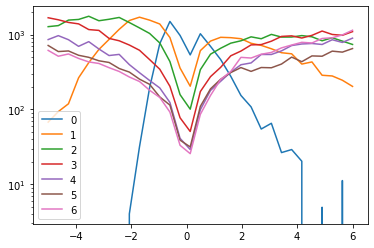

In [11]:
for i in range(len(res)):
    plot(np.linspace(-5,6,31), res[i][:], label='%d'%i)
yscale('log')
legend()

In [12]:
mnu_map = np.load('/Users/dl264294/Downloads/mnu_map.npy')

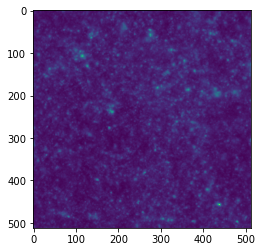

In [13]:
imshow(mnu_map)

In [14]:
wtnorm_mnu = get_wavelet_normalization(mnu_map, nscales=6)

In [15]:
bin_edges_mnu = np.stack([n*np.linspace(-0.1,0.5,16) for n in wtnorm_mnu],axis=0)

In [16]:
peak_counts_mnu = wavelet_peak_counts(mnu_map, bin_edges=bin_edges_mnu)

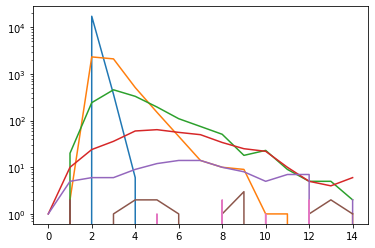

In [17]:
plot(peak_counts_mnu[0])
plot(peak_counts_mnu[1])
plot(peak_counts_mnu[2])
plot(peak_counts_mnu[3])
plot(peak_counts_mnu[4])
plot(peak_counts_mnu[5])
plot(peak_counts_mnu[6])
yscale('log')

In [18]:
kappa_wt_mnu = starlet2d(mnu_map, nscales=6)

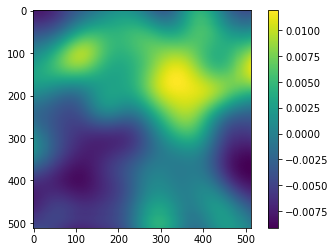

In [19]:
imshow((kappa_wt_mnu[-1])); colorbar();

In [20]:
wtnorm_mnu = get_wavelet_normalization(mnu_map, nscales=6)
# And derive the bin edges for each scales
bin_edges_mnu = np.stack([n*np.linspace(-0.1,0.5,16) for n in wtnorm_mnu],axis=0)

res = wavelet_l1_norm(mnu_map,wtnorm_mnu)

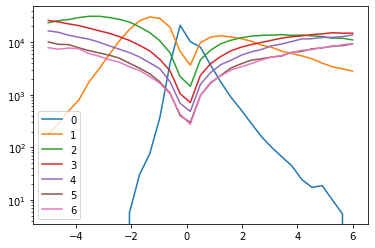

In [21]:
for i in range(len(res)):
    plot(np.linspace(-5,6,31), res[i][:], label='%d'%i)
yscale('log')
legend()